In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
train = pd.read_csv(r"C:\Users\Soham\Downloads\fetal_health.xls")
train.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


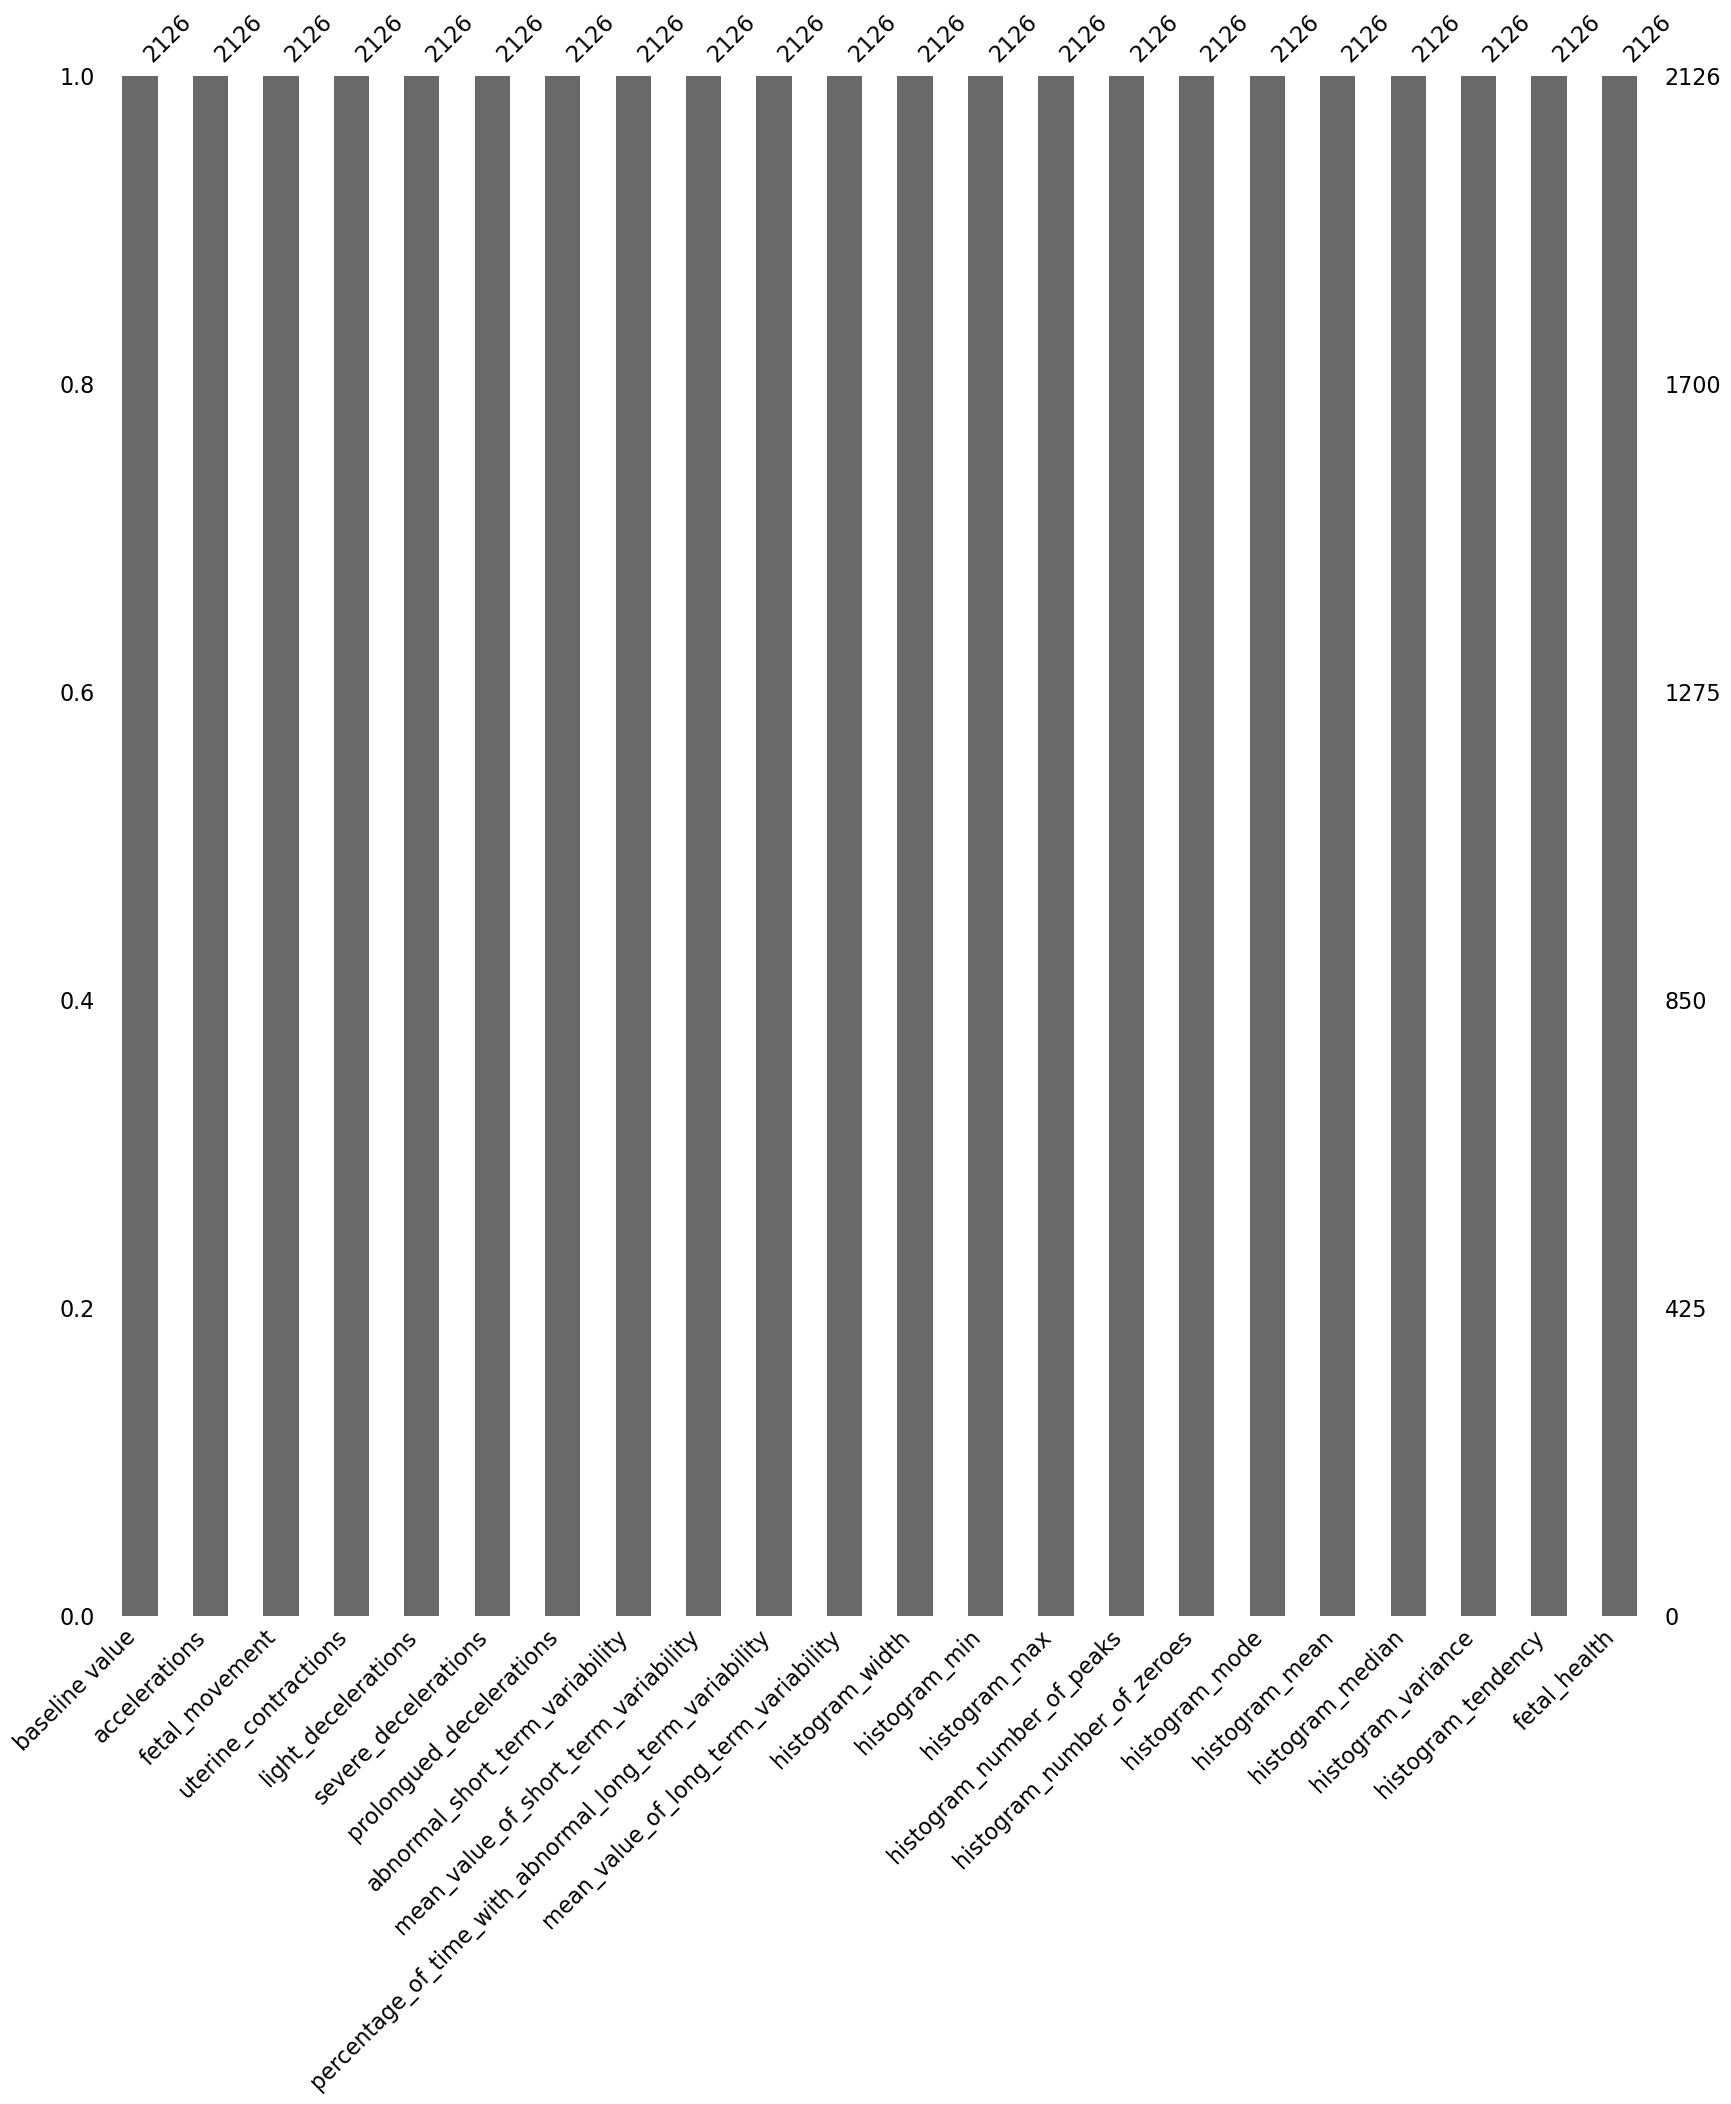

In [4]:
missing_values = msno.bar(train, figsize = (20,20))

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

As the above graph suggests we don't have any null values in this dataset and all values are of type float64


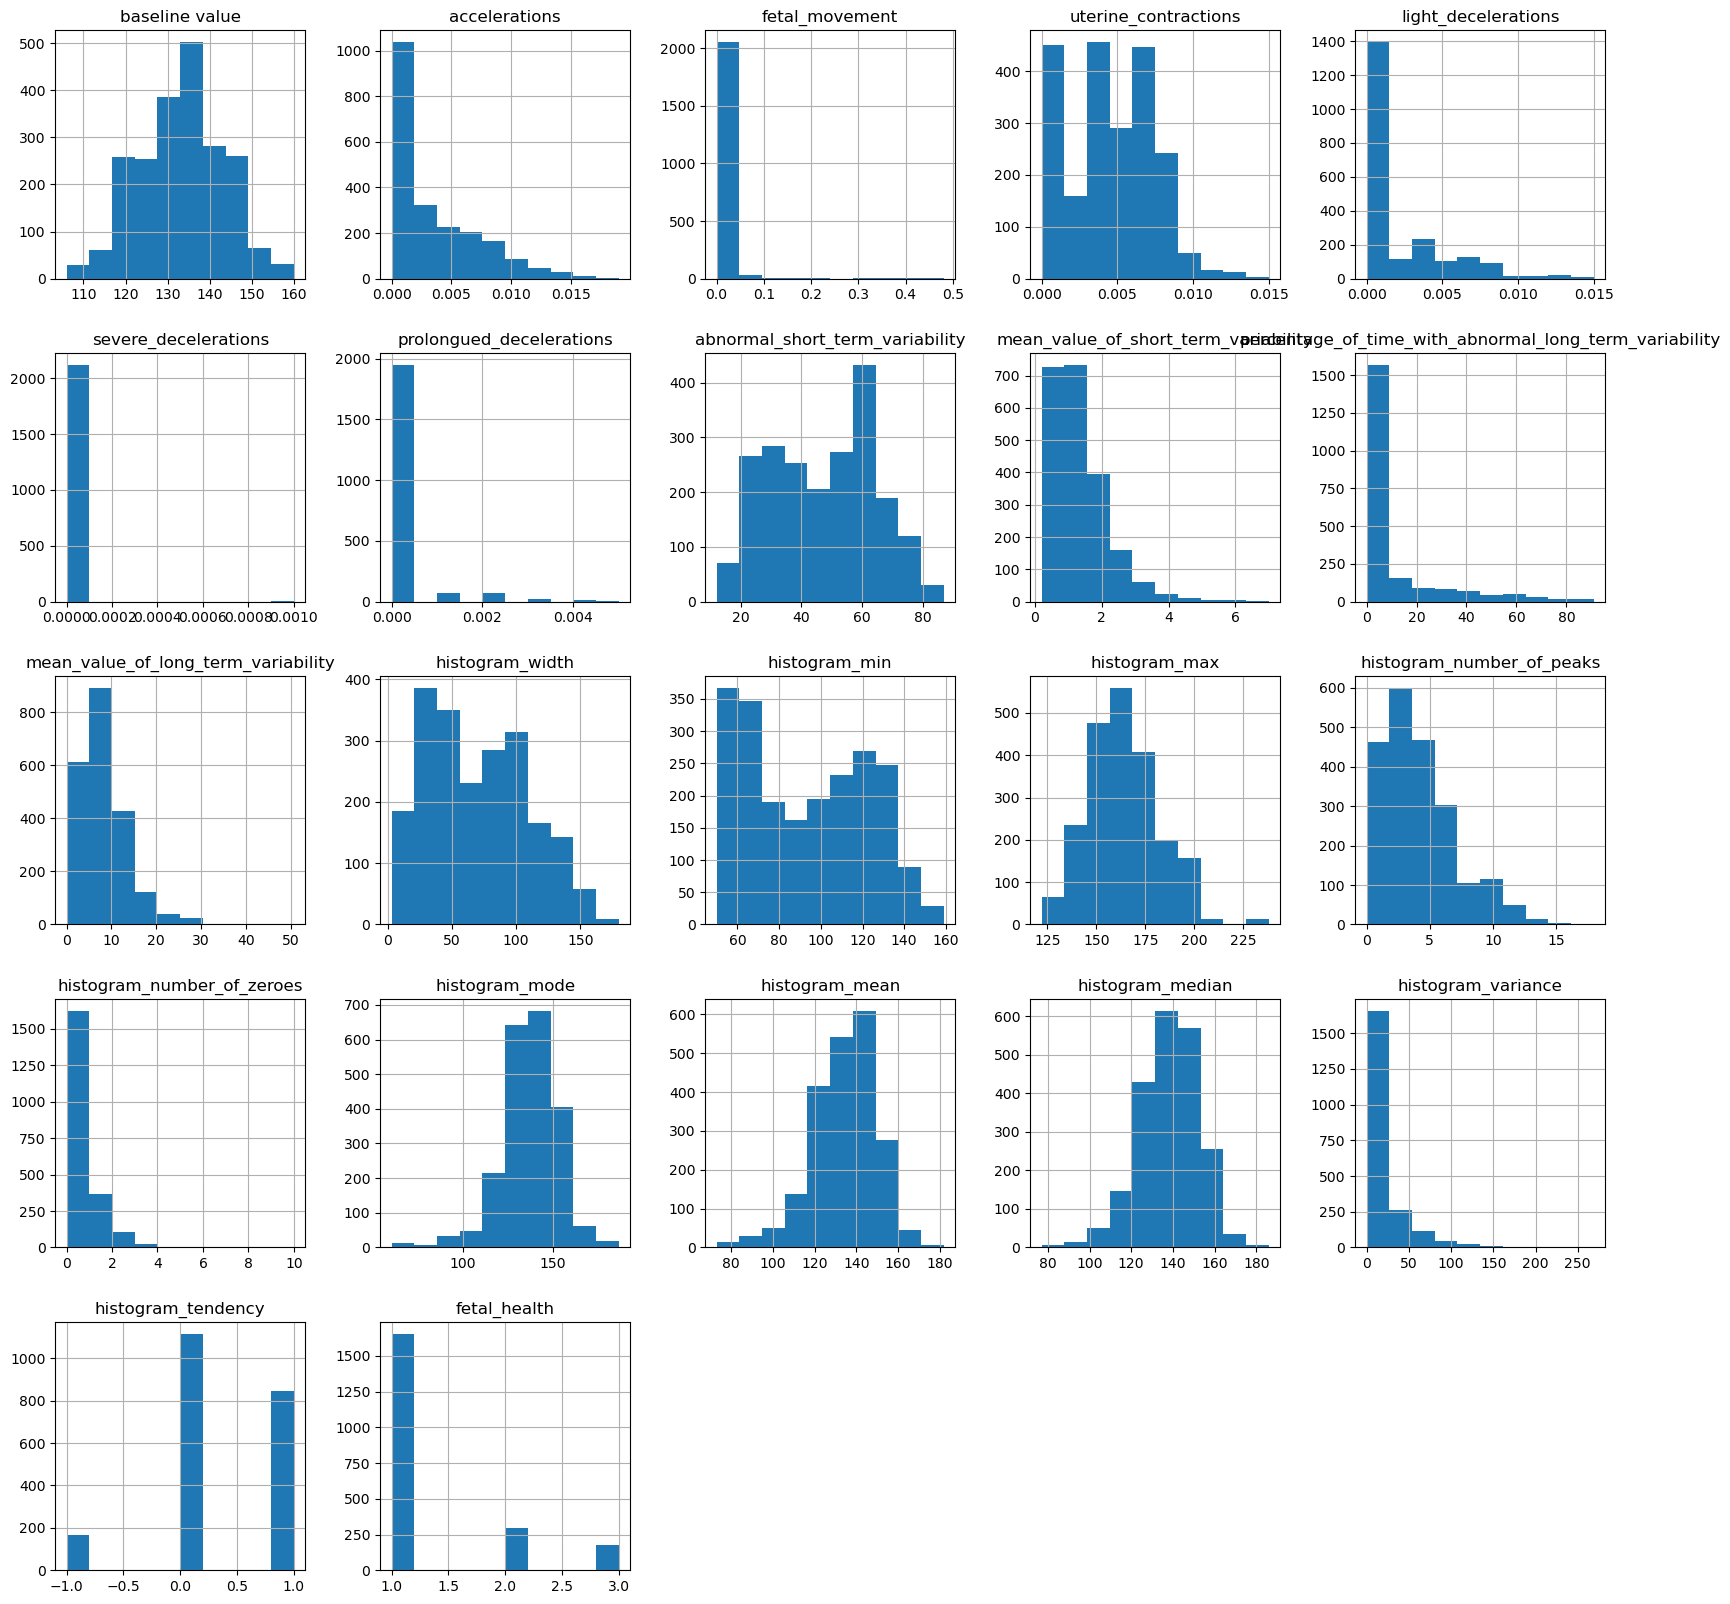

In [6]:
features_description = train.hist(figsize = (20,20))


Evaluation of the distribution of the parameters

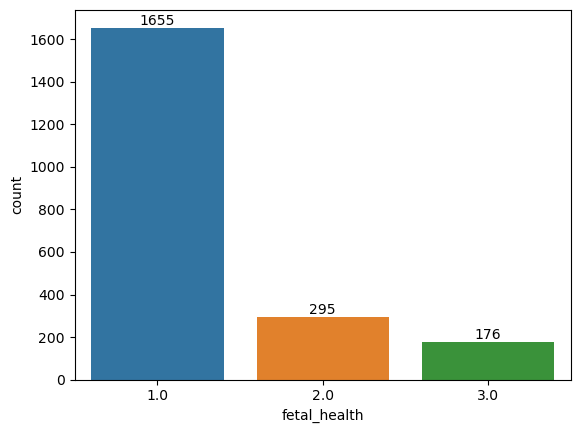

In [7]:
ax = sns.countplot(data= train, x="fetal_health")
ax.bar_label(ax.containers[0])
plt.show()

Target labels are highly imbalanced as shown above


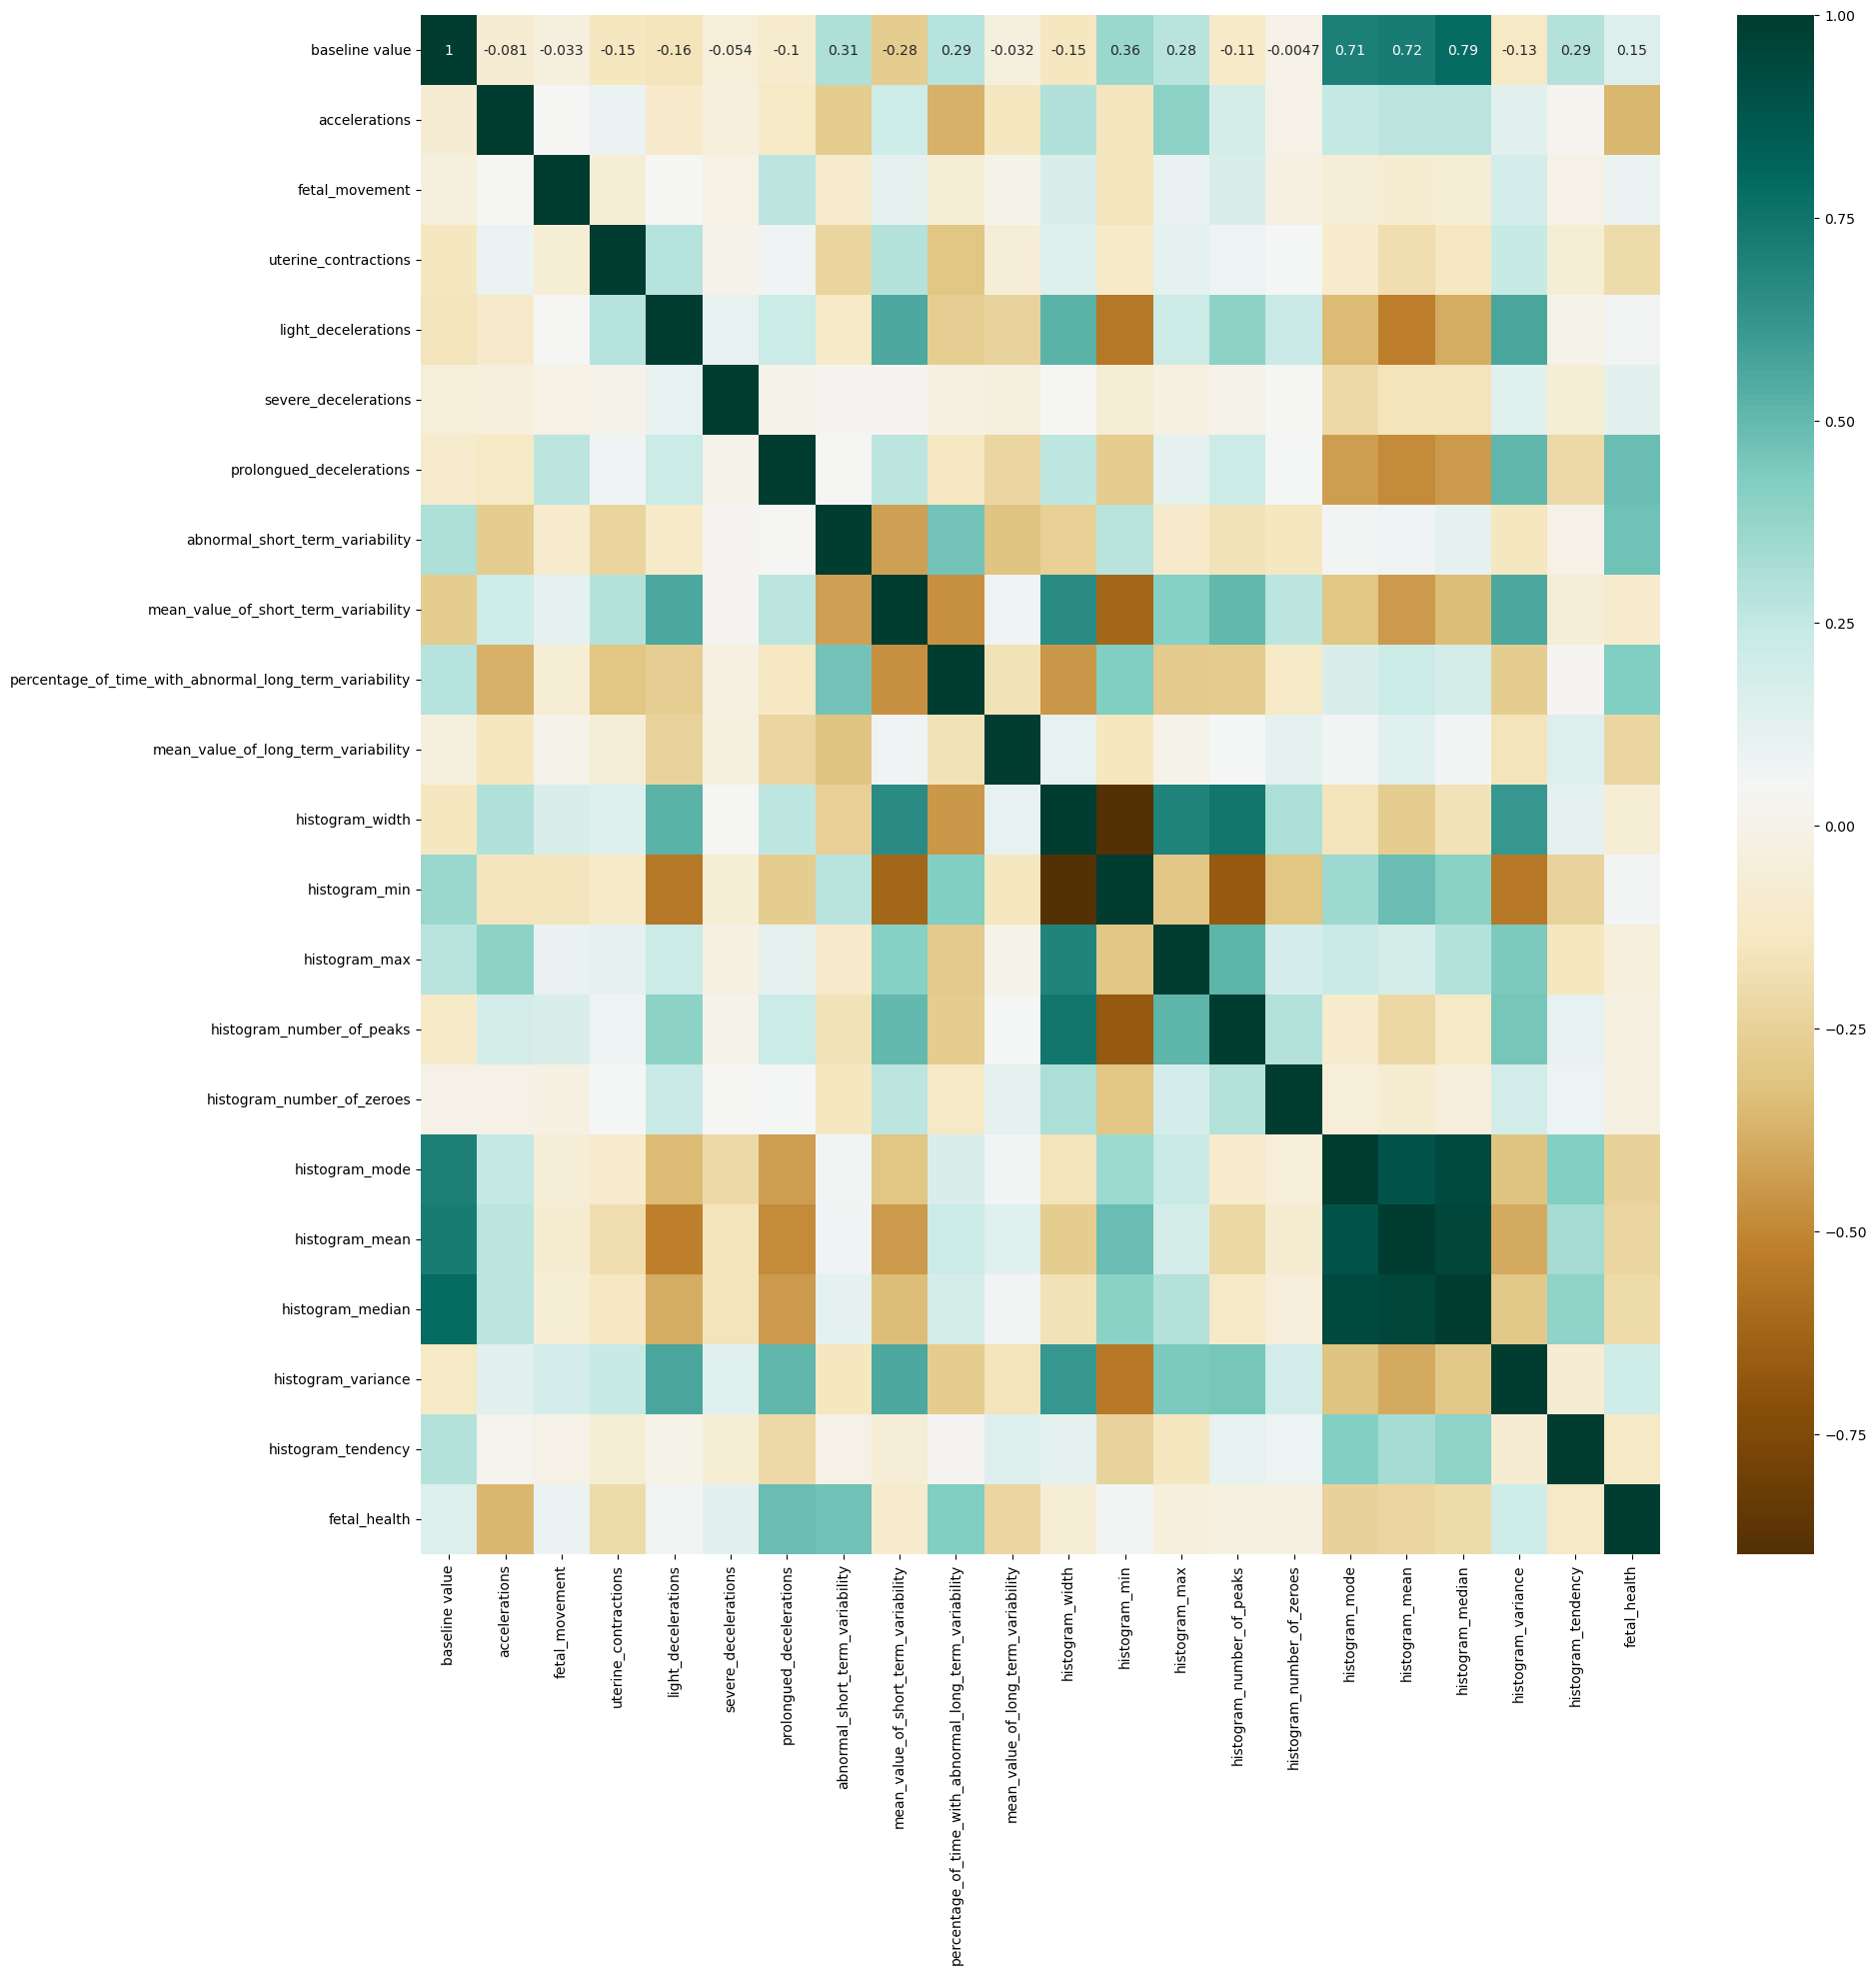

In [8]:
correlation= train.corr()

f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlation,annot=True,cmap="BrBG")
plt.show()

In [9]:
column = train.columns.values.tolist()

In [10]:
col = column[21]
X = train.drop([col],axis=1)
Y = train[col]

c:\Users\Soham\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Soham\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Soham\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Soham\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

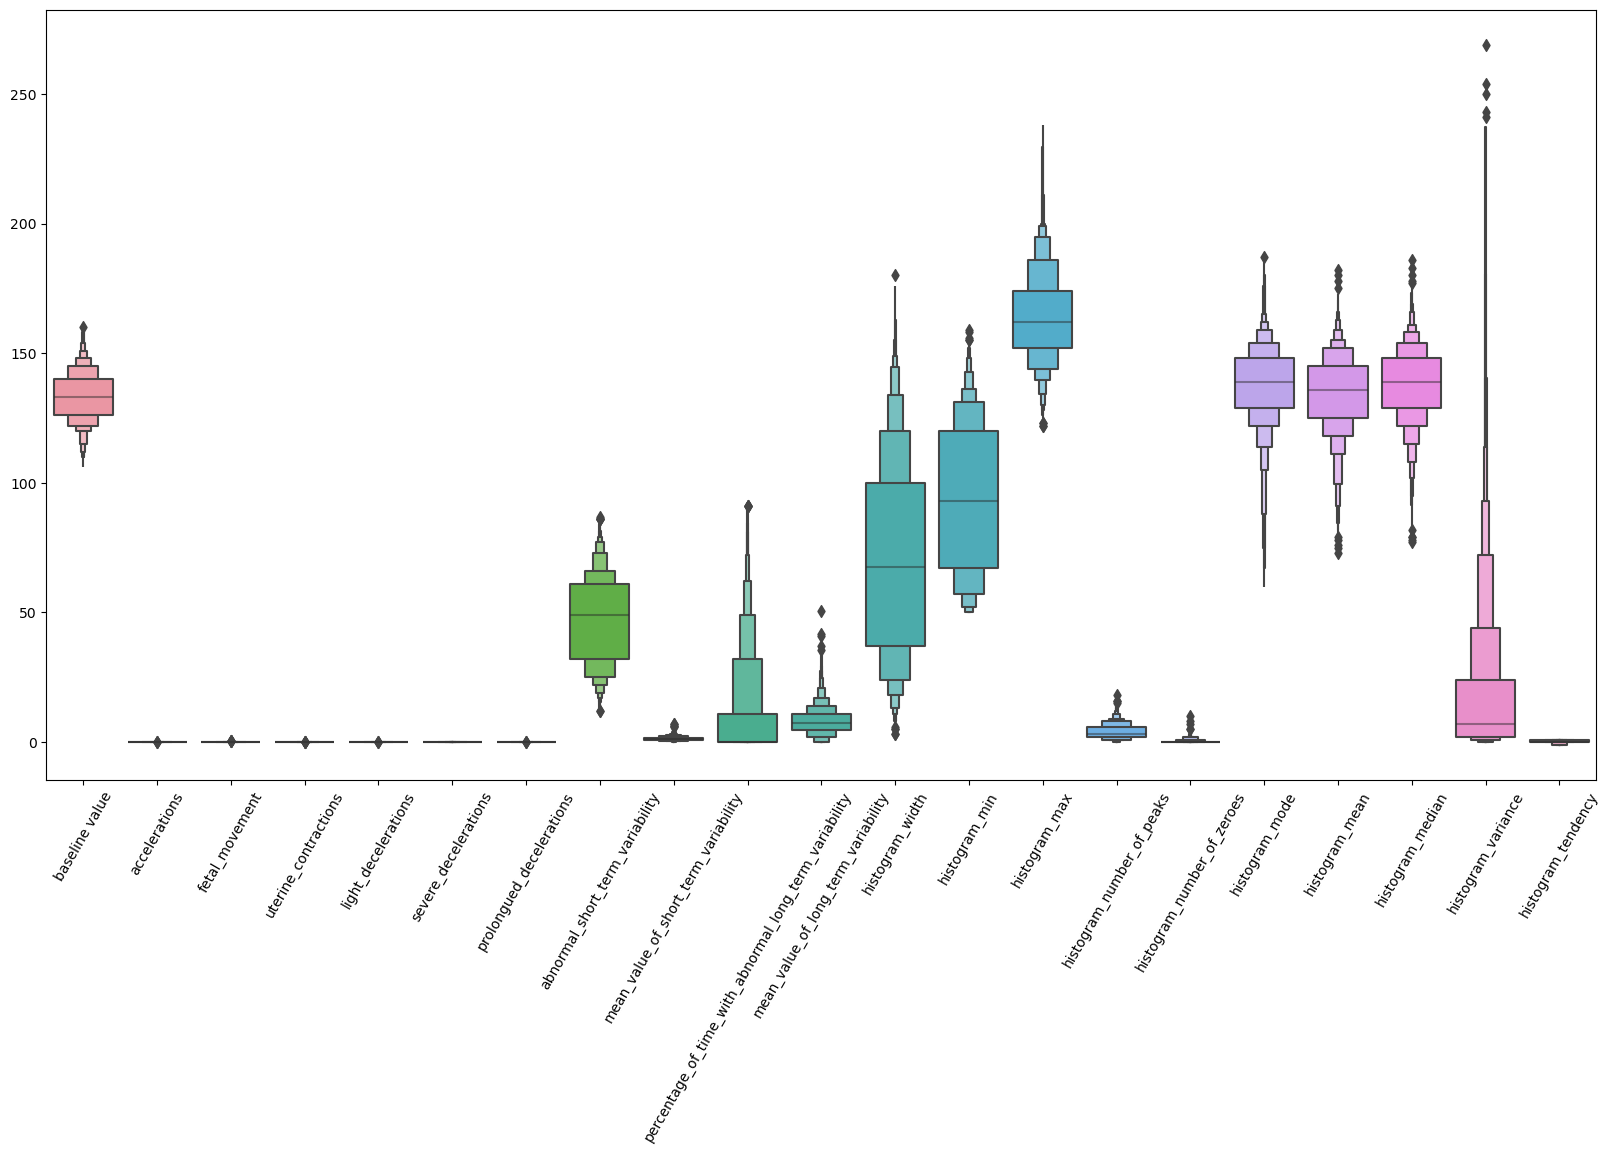

In [11]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = X)
plt.xticks(rotation=60)
plt.show()

According to the above figure we can see that the features are spread out across the 2-D space. We need to scale this data to fit the model better and reduce outliers.

In [12]:
scaler = StandardScaler()
X_scaled= scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=column[:21])   
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,1.069490e-15,1.000235,-2.775197,-0.742373,-0.030884,0.680604,2.713428
accelerations,2126.0,-4.010589e-17,1.000235,-0.822388,-0.822388,-0.304881,0.730133,4.093929
fetal_movement,2126.0,-1.336863e-17,1.000235,-0.203210,-0.203210,-0.203210,-0.138908,10.106540
uterine_contractions,2126.0,-1.336863e-16,1.000235,-1.482465,-0.803434,-0.124404,0.894142,3.610264
light_decelerations,2126.0,-5.347452e-17,1.000235,-0.638438,-0.638438,-0.638438,0.375243,4.429965
severe_decelerations,2126.0,6.684315e-18,1.000235,-0.057476,-0.057476,-0.057476,-0.057476,17.398686
prolongued_decelerations,2126.0,1.336863e-17,1.000235,-0.268754,-0.268754,-0.268754,-0.268754,8.208570
abnormal_short_term_variability,2126.0,-7.352747e-17,1.000235,-2.035639,-0.872088,0.116930,0.815060,2.327675
mean_value_of_short_term_variability,2126.0,6.684315e-17,1.000235,-1.282833,-0.716603,-0.150373,0.415857,6.417893
percentage_of_time_with_abnormal_long_term_variability,2126.0,-5.347452e-17,1.000235,-0.535361,-0.535361,-0.535361,0.062707,4.412293


c:\Users\Soham\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Soham\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Soham\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Soham\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

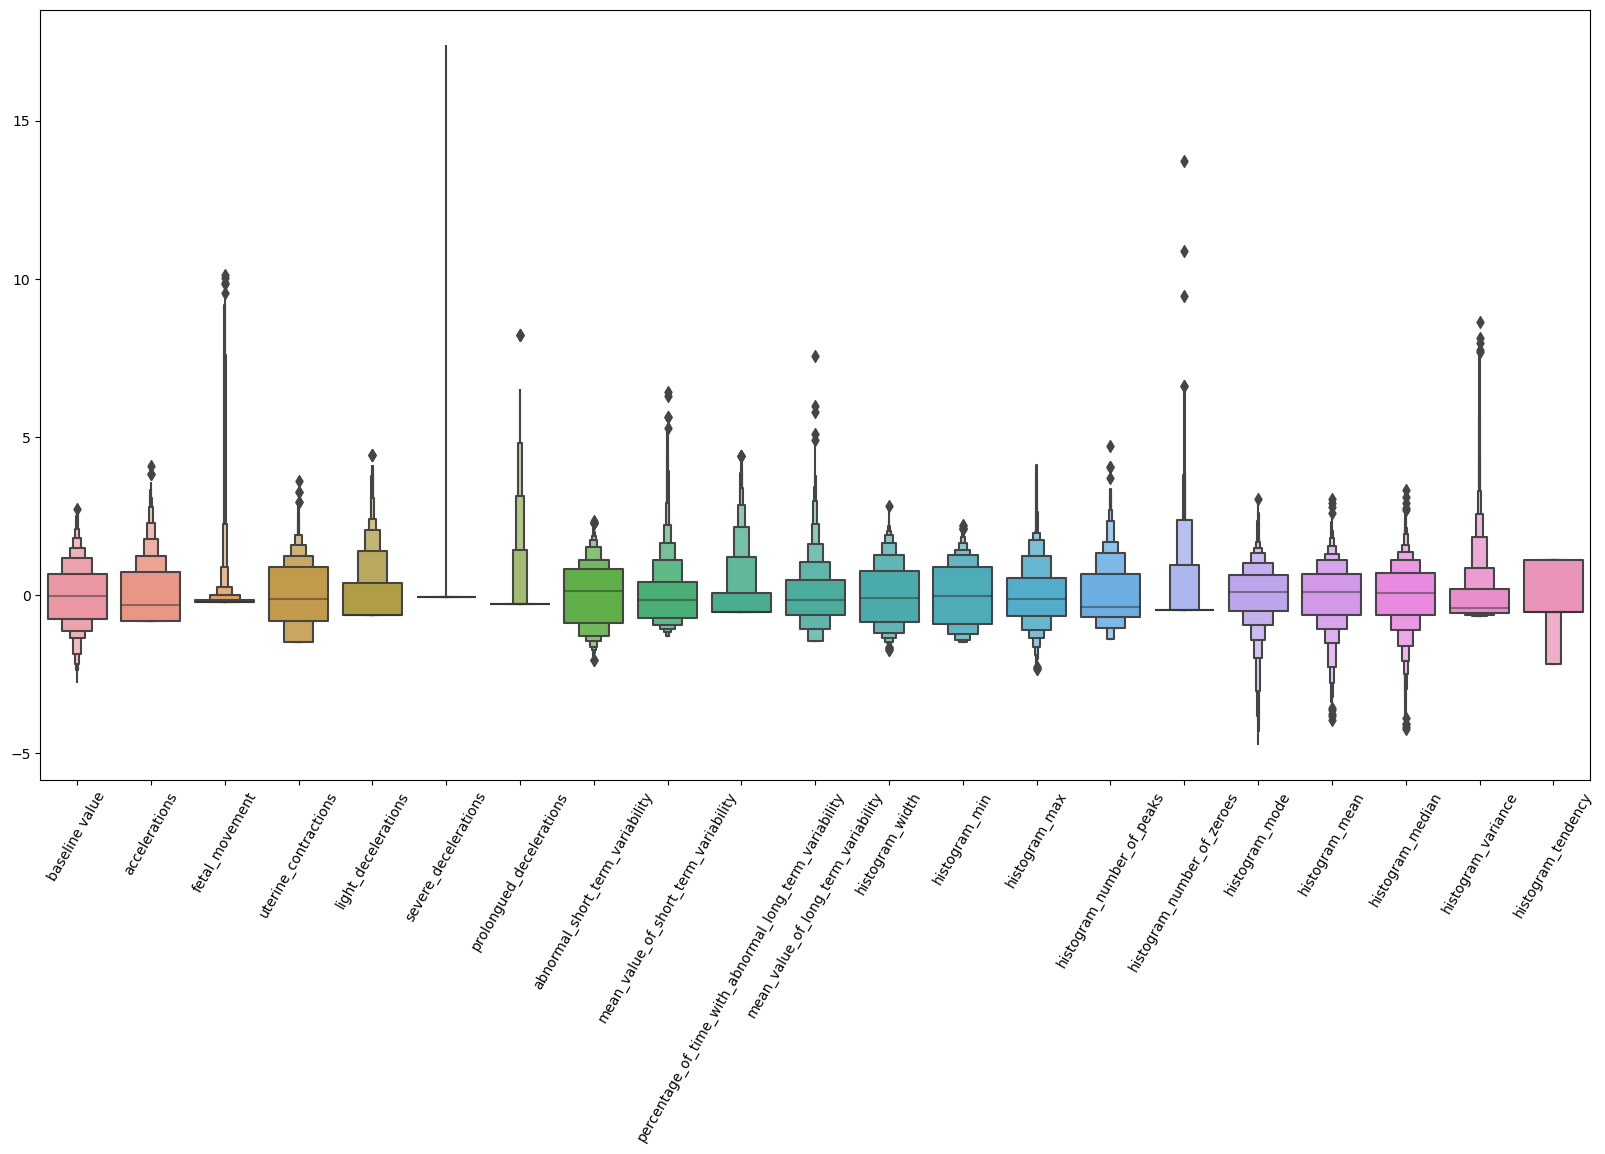

In [13]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_scaled)
plt.xticks(rotation=60)
plt.show()

In [14]:
train_X, test_X, train_Y, test_Y = train_test_split(X_scaled, Y,test_size=0.20, random_state=42)


In [15]:
pipeline_lr = Pipeline([('lr',LogisticRegression())])

pipeline_gbcl = Pipeline([('gbcl',GradientBoostingClassifier())])

pipeline_rf = Pipeline([('rf',RandomForestClassifier())])

pipeline_knn = Pipeline([('knn',KNeighborsClassifier())])

pipeline_svc=Pipeline([('sv',SVC())])

pipelines = [pipeline_lr, pipeline_gbcl, pipeline_rf, pipeline_knn, pipeline_svc]


pipes = ["LogisticRegression" , "GradientBoostingClassifier" ,"RandomForestClassifier" ,"KNeighborsClassifier", "SVC"]
for pipe in pipelines:
    pipe.fit(train_X, train_Y)

In [16]:
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, train_X, train_Y , cv=10)
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipes[i], cv_score.mean()))

c:\Users\Soham\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression: 0.895882 
GradientBoostingClassifier: 0.945882 
RandomForestClassifier: 0.940588 
KNeighborsClassifier: 0.900000 
SVC: 0.912353 


As GradientBoostingClassifier provides the best performance in cross-validation we proceed with this model.

In [17]:
gb = GradientBoostingClassifier()
final_model  = gb.fit(train_X,train_Y)
print(f"GradientBoostingClassifier Score on Test: {final_model.score(test_X,test_Y)}")

GradientBoostingClassifier Score on Test: 0.9483568075117371


Applying Grid Search CV here to get the most accurate parameters for the model.

In [18]:
parameters = {"loss": ["deviance"],
              "learning_rate": [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1], 
              "max_depth": [3, 6, 8]
              }

In [19]:
gbcl_final_model = GridSearchCV(estimator=GradientBoostingClassifier(), 
                                param_grid=parameters, 
                                cv=2,
                                verbose=1, 
                                n_jobs=3,
                                scoring="accuracy", 
                                return_train_score=True
                                )

In [20]:
gbcl_final_model.fit(train_X, train_Y)

Fitting 2 folds for each of 21 candidates, totalling 42 fits


c:\Users\Soham\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_jobs=3,
             param_grid={'learning_rate': [0.05, 0.075, 0.1, 0.25, 0.5, 0.75,
                                           1],
                         'loss': ['deviance'], 'max_depth': [3, 6, 8]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [21]:
best_parameters = gbcl_final_model.best_params_
print(f"Best parameters for the model:\n{best_parameters}")

Best parameters for the model:
{'learning_rate': 0.5, 'loss': 'deviance', 'max_depth': 3}


In [27]:
gbcl = GradientBoostingClassifier(learning_rate=0.5, loss="deviance", 
                                  max_depth=3,random_state=42)

gbcl_model = gbcl.fit(train_X, train_Y)
gbcl_pred = gbcl_model.predict(test_X)
score_gbcl_train = gbcl_model.score(train_X, train_Y)
score_gbcl_test = gbcl_model.score(test_X, test_Y)

c:\Users\Soham\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


In [28]:
print(f"Accuracy on training set = {round(score_gbcl_train, 3)}")
print(f"Accuracy on testing set = {round(score_gbcl_test, 3)}")

Accuracy on training set = 1.0
Accuracy on testing set = 0.958


In [29]:
accuracy = accuracy_score(test_Y, gbcl_pred)
print(f" Testing Score of the model is {accuracy}")

 Testing Score of the model is 0.9577464788732394


In [30]:
print(classification_report(test_Y, gbcl_pred))


              precision    recall  f1-score   support

         1.0       0.98      0.97      0.97       333
         2.0       0.87      0.91      0.89        64
         3.0       0.93      0.93      0.93        29

    accuracy                           0.96       426
   macro avg       0.93      0.94      0.93       426
weighted avg       0.96      0.96      0.96       426



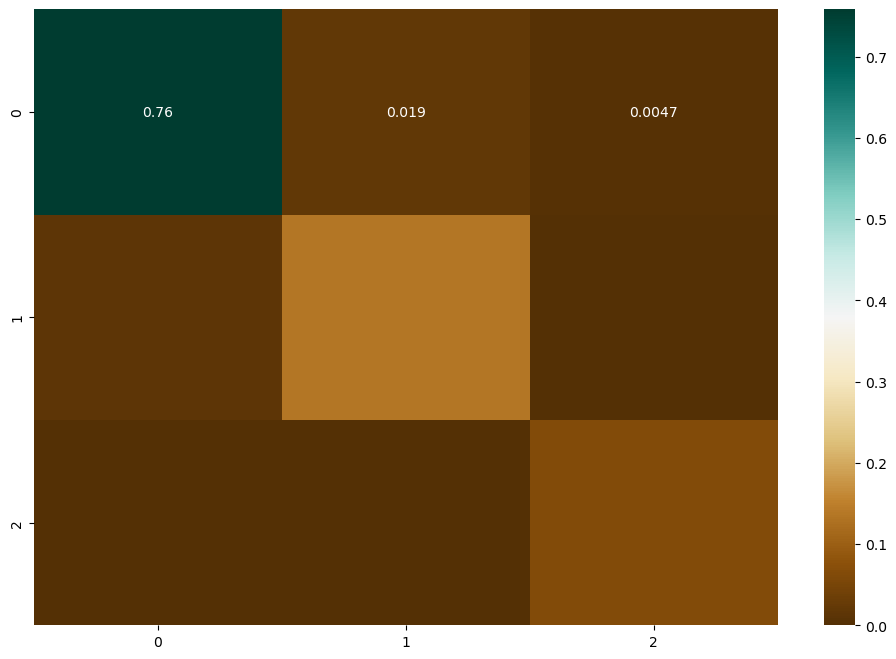

In [31]:
plt.subplots(figsize=(12,8))
cf = confusion_matrix(test_Y, gbcl_pred)
sns.heatmap(cf/np.sum(cf),annot = True,cmap = "BrBG")
plt.show()